#import necessary libraries

In [72]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

#load and explore data

In [3]:

df_train = pd.read_csv('/content/fraudTrain.csv', header = 0)
df_test = pd.read_csv('/content/fraudTest.csv', header = 0)

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [6]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
124356,124356,2019-03-10 13:49:46,4605902936394,fraud_Wilkinson LLC,personal_care,9.87,Vincent,Mueller,M,79019 Taylor Cliffs,...,32.8770,-96.7080,1263321.0,Drilling engineer,1959-06-28,daa7f6a5d27bbc03e526178207733a88,1.331387e+09,33.247965,-97.115063,0.0
124357,124357,2019-03-10 13:50:21,372509258176510,"fraud_McDermott, Osinski and Morar",home,101.77,Kristen,Hanson,F,26544 Andrea Glen,...,42.9147,-83.4845,6951.0,Learning disability nurse,1985-06-18,a151fd84b1d79884d26701de4b5049b1,1.331387e+09,43.377803,-83.350918,0.0
124358,124358,2019-03-10 13:50:36,2233882705243596,fraud_Pacocha-Weissnat,kids_pets,124.24,Jamie,Robinson,F,67089 Caitlin Meadow Apt. 905,...,33.3570,-89.0473,1923.0,Medical physicist,1960-01-16,5cf36b106ab4f0724e69c0aa0ff51775,1.331387e+09,33.503873,-89.988211,0.0
124359,124359,2019-03-10 13:50:42,3506592072985012,fraud_Heidenreich PLC,grocery_pos,33.98,Randy,Murphy,M,0356 Sarah Light,...,38.5770,-90.5255,92608.0,"Engineer, communications",2001-07-26,ae6598fdf35895dc07b115ba0402fe99,1.331387e+09,37.652227,-90.916886,0.0
124360,124360,2019-03-10 13:50:48,4428780983793657331,fraud_Kautzer and Sons,personal_care,67.45,Richard,Waters,M,7683 Natasha Way Apt.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_train.shape

(124361, 23)

In [8]:
df_test.shape

(132077, 23)

In [9]:
df_train.size

2860303

In [10]:
df_test.size

3037771

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124361 entries, 0 to 124360
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             124361 non-null  int64  
 1   trans_date_trans_time  124361 non-null  object 
 2   cc_num                 124361 non-null  int64  
 3   merchant               124361 non-null  object 
 4   category               124361 non-null  object 
 5   amt                    124361 non-null  float64
 6   first                  124361 non-null  object 
 7   last                   124361 non-null  object 
 8   gender                 124361 non-null  object 
 9   street                 124361 non-null  object 
 10  city                   124360 non-null  object 
 11  state                  124360 non-null  object 
 12  zip                    124360 non-null  float64
 13  lat                    124360 non-null  float64
 14  long                   124360 non-nu

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132077 entries, 0 to 132076
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             132077 non-null  int64  
 1   trans_date_trans_time  132077 non-null  object 
 2   cc_num                 132076 non-null  float64
 3   merchant               132076 non-null  object 
 4   category               132076 non-null  object 
 5   amt                    132076 non-null  float64
 6   first                  132076 non-null  object 
 7   last                   132076 non-null  object 
 8   gender                 132076 non-null  object 
 9   street                 132076 non-null  object 
 10  city                   132076 non-null  object 
 11  state                  132076 non-null  object 
 12  zip                    132076 non-null  float64
 13  lat                    132076 non-null  float64
 14  long                   132076 non-nu

In [13]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,124361.000000,1.243610e+05,124361.000000,124360.000000,124360.000000,124360.000000,1.243600e+05,1.243600e+05,124360.000000,124360.000000,124360.000000
mean,62180.000000,4.158740e+17,71.711104,48725.326761,38.537525,-90.179034,8.936391e+04,1.328506e+09,38.539456,-90.179464,0.009336
std,35900.072751,1.306548e+18,149.425895,26903.675068,5.072610,13.754435,3.017827e+05,1.776040e+06,5.105449,13.766558,0.096170
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,31090.000000,1.800365e+14,9.690000,26041.000000,34.620500,-96.792675,7.430000e+02,1.326987e+09,34.749682,-96.875614,0.000000
50%,62180.000000,3.519607e+15,48.090000,48174.000000,39.371600,-87.458100,2.456000e+03,1.328485e+09,39.373899,-87.400657,0.000000
75%,93270.000000,4.635331e+15,83.800000,72011.000000,41.894800,-80.128400,2.047800e+04,1.330120e+09,41.950109,-80.189389,0.000000
max,124360.000000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.331387e+09,66.659242,-66.967742,1.000000


In [14]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,132077.000000,1.320760e+05,132076.000000,132076.000000,132076.000000,132076.000000,1.320760e+05,1.320760e+05,132076.000000,132076.000000,132076.000000
mean,66038.000000,4.173459e+17,69.350217,48825.295928,38.539389,-90.216180,8.840909e+04,1.373780e+09,38.538019,-90.216984,0.004089
std,38127.490089,1.309157e+18,154.463361,26838.480361,5.071945,13.717065,3.006758e+05,1.155929e+06,5.108746,13.730780,0.063811
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.042320,-166.671575,0.000000
25%,33019.000000,1.800429e+14,9.610000,26292.000000,34.668900,-96.798000,7.410000e+02,1.372777e+09,34.749014,-96.894340,0.000000
50%,66038.000000,3.519607e+15,47.265000,48174.000000,39.371600,-87.476900,2.408000e+03,1.373758e+09,39.376389,-87.426516,0.000000
75%,99057.000000,4.634956e+15,82.880000,72042.000000,41.940400,-80.175200,2.032800e+04,1.374814e+09,41.963000,-80.278857,0.000000
max,132076.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.375781e+09,66.669356,-66.952352,1.000000


In [15]:
df_train.isnull().values.any()

True

In [16]:
df_test.isnull().values.any()

True

In [17]:
df_train.count()

,0
Unnamed: 0,124361
trans_date_trans_time,124361
cc_num,124361
merchant,124361
category,124361
amt,124361
first,124361
last,124361
gender,124361
street,124361


In [18]:
df_test.count()

,0
Unnamed: 0,132077
trans_date_trans_time,132077
cc_num,132076
merchant,132076
category,132076
amt,132076
first,132076
last,132076
gender,132076
street,132076


In [19]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [20]:
df_combined.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [21]:
df_combined.shape

(256438, 23)

In [22]:
df_combined.shape

(256438, 23)

In [23]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256438 entries, 0 to 132076
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             256438 non-null  int64  
 1   trans_date_trans_time  256438 non-null  object 
 2   cc_num                 256437 non-null  float64
 3   merchant               256437 non-null  object 
 4   category               256437 non-null  object 
 5   amt                    256437 non-null  float64
 6   first                  256437 non-null  object 
 7   last                   256437 non-null  object 
 8   gender                 256437 non-null  object 
 9   street                 256437 non-null  object 
 10  city                   256436 non-null  object 
 11  state                  256436 non-null  object 
 12  zip                    256436 non-null  float64
 13  lat                    256436 non-null  float64
 14  long                   256436 non-null  f

In [24]:
df_combined.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time","city","state"], axis = 1, inplace = True)

In [25]:
df_combined.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0
1,1,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0
2,2,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,M,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0
3,3,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0
4,4,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,M,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0


In [27]:
print(df_combined.columns[df_combined.columns.duplicated()])


Index([], dtype='object')


In [28]:
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]


In [30]:
print(df_combined.columns)  # List all column names
print(df_combined['gender'].unique())  # Check unique values in 'gender'


Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')
['F' 'M' nan]


In [31]:
df_combined = df_combined.dropna(subset=['gender'])


#Data Visulization

<ipython-input-34-2b204d6270e6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_combined, palette=custom_palette)
<ipython-input-34-2b204d6270e6>:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='gender', data=df_combined, palette=custom_palette)


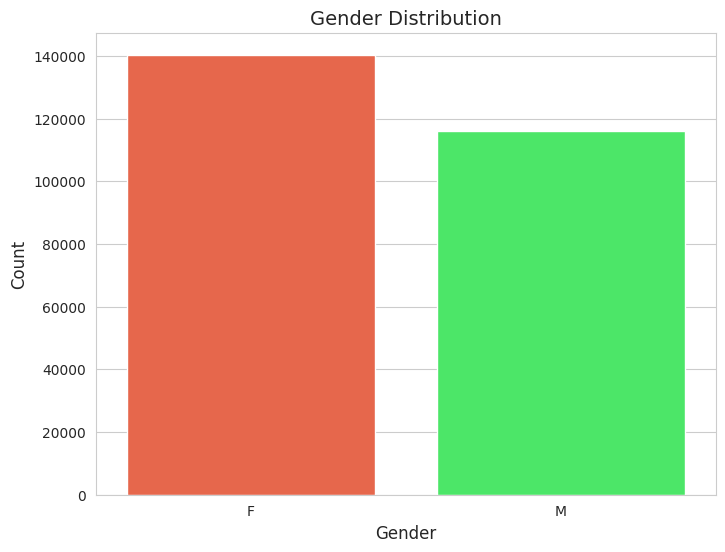

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
custom_palette = ["#FF5733", "#33FF57", "#3357FF", "#F4C724", "#B833FF"]
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_combined, palette=custom_palette)
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [36]:
print(df_combined.dtypes)



Unnamed: 0      int64
cc_num        float64
merchant       object
category       object
amt           float64
gender         object
zip           float64
lat           float64
long          float64
city_pop      float64
unix_time     float64
merch_lat     float64
merch_long    float64
is_fraud      float64
dtype: object


In [37]:
correlation_matrix = df_combined.select_dtypes(include=['number']).corr()


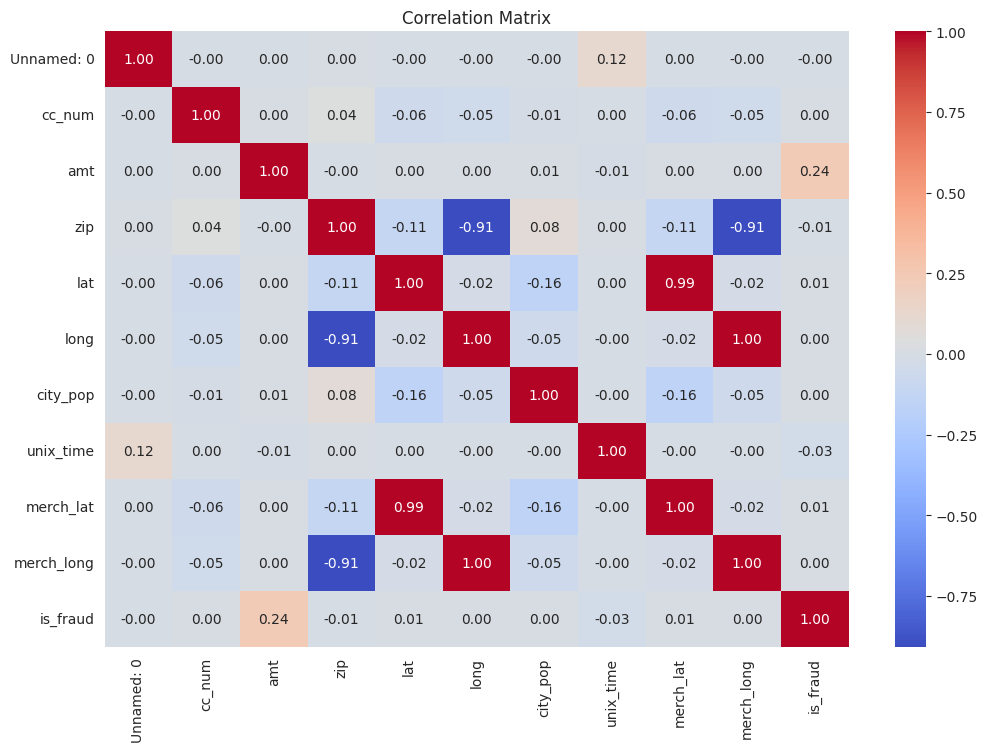

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

plt.title("Correlation Matrix")
plt.show()


#Preprocess the Data

In [39]:
encoder = LabelEncoder()
new_col = encoder.fit_transform(df_combined["merchant"].values)
df_combined["merchant_new"] = new_col
df_combined.drop(labels = ["merchant"], axis = 1, inplace = True)

In [40]:
encoder = LabelEncoder()
new_col1 = encoder.fit_transform(df_combined["category"].values)
df_combined["category_new"] = new_col1
df_combined.drop(labels = ["category"], axis = 1, inplace = True)

In [41]:
df_combined = pd.get_dummies(df_combined)
df_combined.drop(labels=['gender_F'], axis = 1, inplace = True)

In [42]:
df_combined.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2.703186e+15,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,514,8,False
1,1,6.304233e+11,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,241,4,False
2,2,3.885949e+13,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,390,0,True
3,3,3.534094e+15,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,360,2,True
4,4,3.755342e+14,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,297,9,True


In [43]:
X = df_combined.drop("is_fraud", axis = 1)
y = df_combined["is_fraud"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaler = StandardScaler() X_train = Scaler.fit_transform(X_train) X_test = Scaler.transform(X_test)

#Train Logistic Regression Model

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
lr_model = LogisticRegression()

In [74]:
print(y_train.isnull().sum())  # Count NaN values in y_train


1


In [75]:
# Drop NaN values from y_train
X_train = X_train[y_train.notnull()]
y_train = y_train.dropna()


In [76]:
print(y_train.isnull().sum())  # Should be 0 now
print(X_train.shape, y_train.shape)  # Check if dimensions match


0
(205148, 13) (205148,)


In [79]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [80]:
lr_predictions = lr_model.predict(X_test)

In [81]:
print("Logistic Regression Model: ")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))

Logistic Regression Model: 
[[50898    34]
 [  356     0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     50932
         1.0       0.00      0.00      0.00       356

    accuracy                           0.99     51288
   macro avg       0.50      0.50      0.50     51288
weighted avg       0.99      0.99      0.99     51288

Accuracy:  0.992395882077679


#Train Decision Tree Model

In [82]:
dt_model = DecisionTreeClassifier()

In [83]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
dt_predictions = dt_model.predict(X_test)

In [85]:
print("Decision Tree Model: ")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print("Accuracy: ", accuracy_score(y_test, dt_predictions))

Decision Tree Model: 
[[50815   117]
 [   92   264]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50932
         1.0       0.69      0.74      0.72       356

    accuracy                           1.00     51288
   macro avg       0.85      0.87      0.86     51288
weighted avg       1.00      1.00      1.00     51288

Accuracy:  0.9959249727031664


#Train Random Forest Model

In [86]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [87]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [88]:
rf_predictions = rf_model.predict(X_test)

In [89]:
print("Random Forest Model: ")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))

Random Forest Model: 
[[50916    16]
 [  113   243]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50932
         1.0       0.94      0.68      0.79       356

    accuracy                           1.00     51288
   macro avg       0.97      0.84      0.89     51288
weighted avg       1.00      1.00      1.00     51288

Accuracy:  0.9974847917641554
